Метрические методы классификации
1. Методы ближайших соседей
2. Настройка оптимального числа ближайших соседей в методе kNN
3. Выбор метрики в методе kNN
4. Другие метрические методы

# Методы ближайших соседей

*1. Подключитесь к одному из наборов данных на Kaggle: Вариант 3: Bank marketing.*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


In [2]:
#Загрузка данных
df = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
#df.info()

*2. Извлеките целевой признак (target). Какая из задач обучения с учителем рассматривается –– классификация или регрессия?*

Целевым признаком (target) является 'deposit', принимающий значения "yes" и "no", что означает положит клиент срочный депозит или нет. Рассматривается категория - обучение с учителем и тип задачи - классификация (предсказание категории объекта).


*3. Каково распределение значений target-переменной? Постройте подходящую визуализацию. Прокомментируйте результат.*

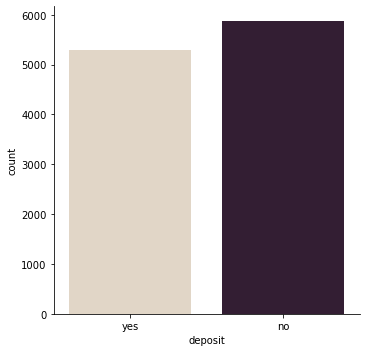

In [5]:
import seaborn as sns
sns.catplot(x = "deposit", kind = "count", palette = "ch:.25", data = df)

In [6]:
# Выведем процентное соотношение
df['deposit'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

In [7]:
# print(df['deposit'].shape) # Всего 11162 строк
df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

Имеем ~52,6% клиентов без депозитов и ~47,4% клиентов c депозитом.

Можно заметить, что классы 'no' и 'yes' почти сбалансированы.

*4. Проведите необходимую предобработку данных (preprocessing). Для построения моделей с помощью метрических методов все признаки должны быть закодированы числами. Полезными будут следующие методы библиотеки Pandas:*
1. map() – для перекодировки категориальной переменной числовыми метками; 
2. get_dummies() – для создания нескольких бинарных признаков на основе категориального. 

*Также может потребоваться масштабирование данных (scaling). Воспользуйтесь классом StandardScaler библиотеки Scikit-learn.*

In [8]:
from sklearn. preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.default)
df['default_le'] = le.transform(df.default)

# ручная альтернатива
#dct = {'no': 0, 'yes': 1} # словарь для кодировки 
#df['default_le'] = df['default'].map(dct)

le_1 = LabelEncoder()
le_1.fit(df.housing)
df['housing_le'] = le_1.transform(df.housing)

le_2 = LabelEncoder()
le_2.fit(df.housing)
df['loan_le'] = le_2.transform(df.loan)

le_3 = LabelEncoder()
le_3.fit(df.housing)
df['deposit_le'] = le_3.transform(df.deposit)

dct_1 = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec':12}
df['month_le'] = df['month'].map(dct_1)

#dct_2 = {'married': 1, 'single': 2, 'divorced': 3}
#df['marital_le'] = df['marital'].map(dct_2)

#dct_3 = {'secondary': 1, 'tertiary': 2, 'primary': 3, 'unknown': 4}
#df['education_le'] = df['education'].map(dct_3)

#dct_4 = {'unknown': 0, 'cellular': 1, 'telephone': 2}
#df['contact_le'] = df['contact'].map(dct_4)

#dct_5 = {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}
#df['poutcome_le'] = df['poutcome'].map(dct_5)

df.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
marital,married,married,married,married,married
education,secondary,secondary,secondary,secondary,tertiary
default,no,no,no,no,no
balance,2343,45,1270,2476,184
housing,yes,no,yes,yes,no
loan,no,no,no,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [9]:
df_1 = pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')
df_1['default'] = df['default_le']
df_1['housing'] = df['housing_le']
df_1['loan'] = df['loan_le']
df_1['deposit'] = df['deposit_le']
df_1['month'] = df['month_le']

#df_1['marital'] = df['marital_le']
#df_1['education'] = df['education_le']
#df_1['contact'] = df['contact_le']
#df_1['poutcome'] = df['poutcome_le']

# get_dummies
df_1 = pd.get_dummies(df_1, columns=['marital', 'education', 'contact', 'poutcome'])

df_1.head().T

,0,1,2,3,4
age,59,56,41,55,54
job,admin.,admin.,technician,services,admin.
default,0,0,0,0,0
balance,2343,45,1270,2476,184
housing,1,0,1,1,0
loan,0,0,0,0,0
day,5,5,5,5,5
month,5,5,5,5,5
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2


In [10]:
#df_1.info()

In [11]:
#df_2 = df_1.drop(['job'], axis = 1)
df_2 = pd.get_dummies(df_1, columns=['job']) 

df_2.head().T

,0,1,2,3,4
age,59,56,41,55,54
default,0,0,0,0,0
balance,2343,45,1270,2476,184
housing,1,0,1,1,0
loan,0,0,0,0,0
day,5,5,5,5,5
month,5,5,5,5,5
duration,1042,1467,1389,579,673
campaign,1,1,1,1,2
pdays,-1,-1,-1,-1,-1


In [12]:
#df_2.info()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Создание X - вся таблица без target (deposit), а y - target (deposit).

y = df_2['deposit']
df_3 = df_2.drop('deposit', axis = 1)

X = df_3

X_new = scaler.fit_transform(X)
X_new

array([[ 1.49150488, -0.12361659,  0.25252514, ..., -0.44181774,
        -0.1817698 , -0.07944089],
       [ 1.23967567, -0.12361659, -0.4599736 , ..., -0.44181774,
        -0.1817698 , -0.07944089],
       [-0.0194704 , -0.12361659, -0.0801603 , ...,  2.26337677,
        -0.1817698 , -0.07944089],
       ...,
       [-0.77495804, -0.12361659, -0.46493443, ...,  2.26337677,
        -0.1817698 , -0.07944089],
       [ 0.14841574, -0.12361659, -0.47392593, ...,  2.26337677,
        -0.1817698 , -0.07944089],
       [-0.6070719 , -0.12361659, -0.47392593, ...,  2.26337677,
        -0.1817698 , -0.07944089]])

*5. Разбейте набор данных на обучающую и валидационную (тестовую) выборки с помощью метода train_test_split.*

In [14]:
# Разбиение
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size=0.25, 
                                                      random_state=20) 

#random_state. Controls the shuffling applied to the data before applying the split. 

In [15]:
print(X_train.shape, y_train.shape)
print( X_valid.shape, y_valid.shape)

(8371, 37) (8371,)
(2791, 37) (2791,)


*6. Обучите алгоритм классификации kNeighborsClassifier или регрессии KNeighborsRegressor . Оцените качество каждой модели на валидационной выборке с помощью*
1. accuracy_score для классификации;
2. mean_squared_error для регрессии.

*Сравните результаты и сделайте выводы.*

In [16]:
#Обучение классификатора
# Создаём представителя класса модели, задаём необходимые гиперпараметры

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
# Обучаем модель на обучающей выборке
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Строим предсказания на основе обученной модели
y_pred = knn.predict(X_valid)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [19]:
#Функция mean_squared_error вычисляет среднеквадратичную ошибку, метрику риска, 
#соответствующую ожидаемому значению квадратичной ошибки или убытка.

from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, y_pred)

0.29308491580078827

In [20]:
# Вычисляем метрику
knn.score(X_valid, y_valid)

0.7069150841992118

In [21]:
# Ещё один способ для вычисления метрики
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.7069150841992118


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_valid, y_pred))

[[1064  390]
 [ 428  909]]


Cреднеквадратическая ошибка мала, а score достаточно большое, откуда следует, что  модель можно считать качественной.

Также можно сделать вывод, что модель предсказывает случаи 'no' немного лучше чем 'yes', что очевидно, ведь ноборов 'no' в данном датасете больше. 

# Настройка оптимального числа ближайших соседей в методе kNN

*1. Создайте генератор разбиений, который перемешивает выборку перед созданием блоков ( shuffle=True ). Число блоков n_splits равно 5. Задайте также параметр random_state для воспроизводимости результатов. Например: kf = KFold(n_splits=5, shuffle=True, random_state=42).*

*Найдите показатель качества модели kNN на кросс-валидации. Подумайте, приемлемо ли использование вашей меры (метрики) качества в данной задаче? При необходимости пересчитайте качество с помощью другой метрики из списка.*

In [23]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(knn, X, y, cv = kf, scoring = 'accuracy')
scores.mean()

0.7059662250985943

В лучщем случае метод должен вернуть положительное значение с плавающей запятой (лучшее - 1). Имеется число наближенное к 1-е, следовательное использованиие этой метрики для данной задачи 
приемлимо. 

Для примера,рассмотрим ещё F1 score. The F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

In [24]:
scores = cross_val_score(knn, X, y, cv = kf, scoring = 'f1')
scores.mean()

0.6851150677234813

Полученное значение наближенно к единице,но хуже предыдущего случая.

*2. Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используйте GridSearchCV . При каком k качество получилось наилучшим? Чему равна эта оценка качества? Постройте график значений метрики в зависимости от k (matplotlib.pyplot.plot()).*

In [25]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors': np.arange(1, 51)}
knn_grid = GridSearchCV(knn, 
                        knn_params, 
                        scoring='f1',
                        cv = kf)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='f1')

In [26]:
print("Best_estimator: ", knn_grid.best_estimator_)
print("Cross-validated score of the best_estimator: ", knn_grid.best_score_)
print( "Best_index_ while the best_score_ attribute will not be available: ", knn_grid.best_params_)

Best_estimator:  KNeighborsClassifier(n_neighbors=13)
Cross-validated score of the best_estimator:  0.736035999768965
Best_index_ while the best_score_ attribute will not be available:  {'n_neighbors': 13}


In [27]:
cv_results = pd.DataFrame(knn_grid.cv_results_)
cv_results.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
mean_fit_time,0.0282763,0.0283842,0.0283089,0.0287024,0.02857,0.028268,0.0292572,0.0288674,0.0287075,0.0289191,...,0.0286097,0.0289476,0.0286537,0.0298603,0.0293597,0.0293304,0.0292419,0.0291004,0.0293229,0.0368288
std_fit_time,0.000351265,0.00023847,0.000337453,0.000510275,0.000519104,0.000467278,0.000268001,0.000641664,0.000454874,0.00023247,...,0.000744326,0.00044137,0.000336187,0.001384,0.000646182,0.000755197,0.000434807,0.000500474,0.000785537,0.00201853
mean_score_time,0.095235,0.09859,0.101182,0.102869,0.104191,0.10573,0.109626,0.108924,0.11064,0.111774,...,0.142203,0.139824,0.140047,0.143102,0.146277,0.147451,0.146972,0.148859,0.153452,0.190507
std_score_time,0.000635955,0.00148966,0.000986572,0.00112934,0.000590933,0.000902385,0.00131907,0.002181,0.00097707,0.00106126,...,0.00669549,0.00132296,0.00190214,0.00555125,0.00762054,0.00639708,0.00247029,0.00756067,0.00766542,0.0158373
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},...,{'n_neighbors': 41},{'n_neighbors': 42},{'n_neighbors': 43},{'n_neighbors': 44},{'n_neighbors': 45},{'n_neighbors': 46},{'n_neighbors': 47},{'n_neighbors': 48},{'n_neighbors': 49},{'n_neighbors': 50}
split0_test_score,0.70988,0.606107,0.716113,0.672792,0.724028,0.695055,0.720102,0.699329,0.728316,0.703282,...,0.727869,0.719788,0.725361,0.716378,0.726557,0.716755,0.723934,0.723179,0.722986,0.722333
split1_test_score,0.676184,0.602675,0.730097,0.673866,0.730242,0.70028,0.735198,0.711354,0.742561,0.720162,...,0.724161,0.719146,0.725955,0.718876,0.727873,0.721289,0.722924,0.72118,0.721485,0.716779
split2_test_score,0.672823,0.609929,0.714754,0.688359,0.730424,0.709366,0.727624,0.717808,0.738402,0.729111,...,0.725936,0.722449,0.725569,0.720978,0.728123,0.727642,0.727878,0.720379,0.724024,0.718329
split3_test_score,0.681388,0.623591,0.725898,0.686713,0.724181,0.705163,0.731738,0.731966,0.738854,0.729927,...,0.733078,0.736093,0.732951,0.734932,0.733205,0.731865,0.732018,0.73234,0.731801,0.729381


In [28]:
# Предсказания на тестовой выборке для оптимального числа соседей
y_pred = knn_grid.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7667502687208886

In [29]:
best_knn = KNeighborsClassifier(n_neighbors=13)
y_pred = best_knn.fit(X_train, y_train).predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7667502687208886

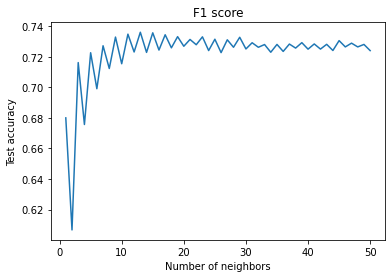

In [30]:
import matplotlib.pyplot as plt
plt.plot(cv_results["param_n_neighbors"],cv_results["mean_test_score"])

plt.xlabel('Number of neighbors')
plt.ylabel('Test accuracy')
plt.title('F1 score')
plt.show()

 При k = 13 качество получилось наилучшим.


# Выбор метрики в методе kNN

*1. Переберите разные варианты значений параметра p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (удобно использовать функцию numpy.linspace ). Используйте KNeighborsClassifier или KNeighborsRegressor с оптимальным значением n_neighbors , найденным ранее. Задайте опцию weights='distance' – данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества снова используйте accuracy . Качество оценивайте с помощью кросс-валидации по 5 блокам.*

In [31]:
knn_params = {"p": np.linspace(1,10, 200)}

knn = KNeighborsClassifier(n_neighbors = 13, weights = "distance", n_jobs = -1)
knn.fit(X_train, y_train)

cv = GridSearchCV(knn, knn_params, cv = kf, scoring="f1")
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=13,
                                            weights='distance'),
             param_grid={'p': array([ 1.        ,  1.04522613,  1.09045226,  1.13567839,  1.18090452,
        1.22613065,  1.27135678,  1.31658291,  1.36180905,  1.40703518,
        1.45226131,  1.49748744,  1.54271357,  1.5879397 ,  1.63316583,
        1.67839196,  1.72361809,  1.76884422...
        8.46231156,  8.50753769,  8.55276382,  8.59798995,  8.64321608,
        8.68844221,  8.73366834,  8.77889447,  8.8241206 ,  8.86934673,
        8.91457286,  8.95979899,  9.00502513,  9.05025126,  9.09547739,
        9.14070352,  9.18592965,  9.23115578,  9.27638191,  9.32160804,
        9.36683417,  9.4120603 ,  9.45728643,  9.50251256,  9.54773869,
        9.59296482,  9.63819095,  9.68341709,  9.72864322,  9.77386935,
        9.81909548,  9.86432161,  9.90954774,  9.95477387, 10.        ])

*2. Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей.*

In [32]:

print("Лучшее значение:", cv.best_score_)
print(cv.best_estimator_)

Лучшее значение: 0.7417053508092902
KNeighborsClassifier(n_jobs=-1, n_neighbors=13, p=1.0, weights='distance')


In [33]:
cv_result = pd.DataFrame(cv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029282,0.001237,0.384098,0.684684,1,{'p': 1.0},0.739018,0.740353,0.740053,0.747926,0.741176,0.741705,0.003186,1
1,0.029564,0.000527,0.231903,0.007779,1.04523,{'p': 1.0452261306532664},0.733506,0.741661,0.748021,0.747126,0.736773,0.741418,0.005664,2
2,0.029951,0.000476,0.226484,0.007507,1.09045,{'p': 1.0904522613065326},0.732558,0.739187,0.745539,0.749045,0.735121,0.740290,0.006195,5
3,0.029548,0.000362,0.214716,0.005156,1.13568,{'p': 1.135678391959799},0.735484,0.742820,0.744217,0.748247,0.734987,0.741151,0.005151,3
4,0.028906,0.000532,0.210269,0.005070,1.1809,{'p': 1.1809045226130652},0.734668,0.741176,0.743234,0.749045,0.734987,0.740622,0.005390,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.029443,0.000583,0.161403,0.003586,9.8191,{'p': 9.819095477386934},0.733586,0.734932,0.729852,0.743980,0.723377,0.733145,0.006739,88
196,0.029940,0.000438,0.163653,0.003685,9.86432,{'p': 9.864321608040202},0.733586,0.734932,0.729852,0.743980,0.723377,0.733145,0.006739,88
197,0.029564,0.000282,0.164485,0.005773,9.90955,{'p': 9.909547738693467},0.733586,0.734932,0.729852,0.743980,0.723377,0.733145,0.006739,88
198,0.028971,0.000481,0.162362,0.004760,9.95477,{'p': 9.954773869346734},0.733586,0.734932,0.729852,0.743980,0.723377,0.733145,0.006739,88


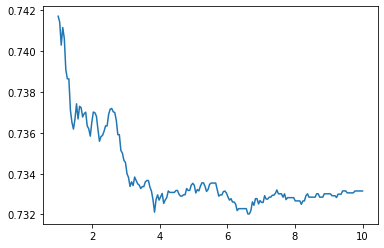

In [34]:
plt.plot(cv_result["param_p"],cv_result["mean_test_score"])

# Другие метрические методы

*Поэкспериментируйте с другими метрическими методами для задач регрессии и классификации, представленными в библиотеке Scikit-learn:*
1. RadiusNeighborsClassifier;
2. RadiusNeighborsRegressor;
3. NearestCentroid

In [35]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X_train, y_train)
NearestCentroid()

y_pred_nc = clf.predict(X_valid)
y_pred_nc

array([1, 0, 0, ..., 0, 1, 1])

In [36]:
mean_squared_error(y_valid, y_pred_nc)

0.4113221067717664

In [37]:
print(accuracy_score(y_valid, y_pred_nc))

0.5886778932282336


In [38]:
print(confusion_matrix(y_valid, y_pred_nc))

[[1156  298]
 [ 850  487]]


Метод NearestCentroid в сравнении с kNN даёт хуже результат, так как среднеквадратическая ошибка по значению близка к score.